In [7]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [9]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']== 'United States')].copy()
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


Text(0, 0.5, 'Number of Jobs')

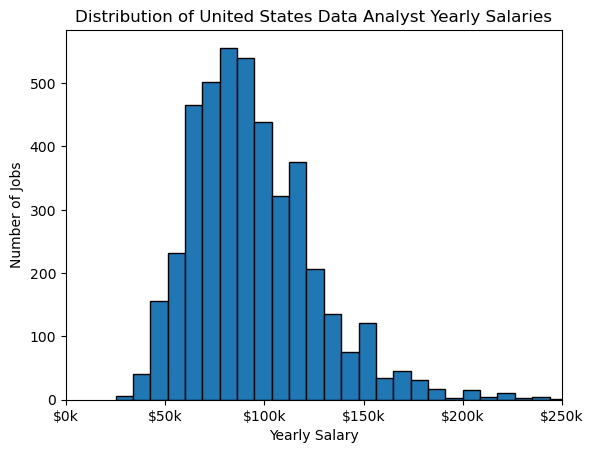

In [23]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor='black')

plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

In [28]:
df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

job_title_short
Senior Data Scientist        154206.292996
Senior Data Engineer         145840.611624
Data Scientist               135988.837171
Data Engineer                130125.604250
Machine Learning Engineer    126774.315972
Senior Data Analyst          113911.363665
Software Engineer            113393.760054
Cloud Engineer               111268.453846
Data Analyst                  93841.907854
Business Analyst              91082.612833
Name: salary_year_avg, dtype: float64

In [76]:
df_DS_IN = df[(df['job_title_short']=='Data Scientist') & (df['job_country']== 'India')].copy()
df_DS_IN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
239,Data Scientist,Power BI Data Analytics & Data Scientist,"Maharashtra, India",via Shine,Full-time,False,India,2023-11-11 13:10:08,False,False,India,None,NaN,NaN,Emerson,[power bi],{'analyst_tools': ['power bi']}
323,Data Scientist,Forecasting Analyst,Anywhere,via LinkedIn,Full-time,True,India,2023-09-28 13:48:45,False,False,India,None,NaN,NaN,Straive,[excel],{'analyst_tools': ['excel']}
389,Data Scientist,Data Scientist,"New Delhi, Delhi, India",via LinkedIn,Contractor,False,India,2023-09-12 13:16:27,False,False,India,None,NaN,NaN,Digital India Corporation,"[sql, sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785591,Data Scientist,Data Scientist T8,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-01-01 06:29:03,False,False,India,None,NaN,NaN,Mercedes-Benz Research and Development India P...,"[java, python, aws, azure, kubernetes, docker,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
785645,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,Internship,True,India,2023-01-20 06:51:23,False,False,India,None,NaN,NaN,TwiLearn EduTech Pvt. Ltd.,"[python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785654,Data Scientist,Data Science Intern,Anywhere,via LinkedIn,None,True,India,2023-01-31 06:11:46,False,False,India,None,NaN,NaN,Corizo,[zoom],{'sync': ['zoom']}
785674,Data Scientist,Data Scientist,"Kolkata, West Bengal, India",via LinkedIn,Full-time,False,India,2023-01-12 06:12:32,False,False,India,None,NaN,NaN,One Billion Ideas Pvt. LTD.,"[r, python, sql, scala, java, c++, matplotlib,...","{'analyst_tools': ['tableau'], 'libraries': ['..."


Text(0, 0.5, 'Number of Jobs')

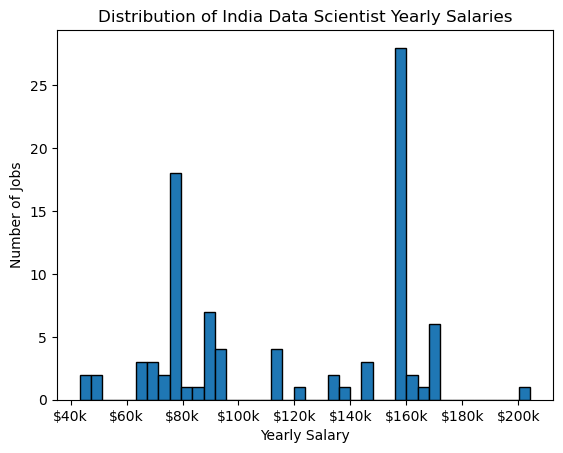

In [78]:
df_DS_IN['salary_year_avg'].plot(kind='hist', bins =40, edgecolor='black')
#plt.xlim(0,200000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.title('Distribution of India Data Scientist Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
